<a href="https://colab.research.google.com/github/akhilpotdar1/Venomous_snake_classifier/blob/master/Venomous_snake_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#hide
!pip install -Uqq fastbook
import fastbook
# fastbook.setup_book()

     |████████████████████████████████| 1.0MB 11.5MB/s 
     |████████████████████████████████| 51kB 7.1MB/s 
     |████████████████████████████████| 61kB 7.9MB/s 
     |████████████████████████████████| 358kB 20.4MB/s 
     |████████████████████████████████| 40kB 6.7MB/s 
     |████████████████████████████████| 92kB 11.7MB/s 
     |████████████████████████████████| 61kB 9.7MB/s 
     |████████████████████████████████| 51kB 8.4MB/s 
     |████████████████████████████████| 2.6MB 31.1MB/s 
ERROR: fastai 2.0.6 has requirement pandas>=1.1.0, but you'll have pandas 1.0.5 which is incompatible.


In [2]:
#hide
from fastbook import *
from fastai.vision.widgets import *

In [ ]:
pip install pandas

## Gathering Data

To download images with Bing Image Search, sign up at Microsoft for a free account. You will be given a key, which you can copy and enter in a cell as follows (replacing 'XXX' with your key and executing it):

In [3]:
key = ''

In [4]:
search_images_bing

<function fastbook.search_images_bing>

In [39]:
results = search_images_bing(key, 'venomous snakes')
ims = results.attrgot('content_url')
len(ims)

150

In [40]:
ims

(#150) ['https://earthnworld.com/wp-content/uploads/2017/04/ROUGH-GREEN-SNAKE.jpg','https://survivallife.com/wp-content/uploads/2016/02/blue-viper-venomous-poisonous-snake-Venomous-Snakes-ss-Featured.jpg','http://listverse.com/wp-content/uploads/2011/03/8367988449_6a575d88a5_z.jpg','http://www.elitereaders.com/wp-content/uploads/2016/02/ten-most-venomous-snakes-2.jpg','https://i.ytimg.com/vi/W3Bl3T7cetU/maxresdefault.jpg','https://cdn.lolwot.com/wp-content/uploads/2016/02/10-of-the-most-venomous-snakes-in-the-world-5.jpg','https://i0.wp.com/earthnworld.com/wp-content/uploads/2017/04/Python.jpg?ssl=1','https://i.ytimg.com/vi/qv2hvCJrM4Q/maxresdefault.jpg','http://dailynewsdig.com/wp-content/uploads/2015/06/Venomous-Snakes-You-Wouldnt-Want-To-Adopt-As-A-Pet-3.jpg','https://i.ytimg.com/vi/8g0bmVGbSAw/maxresdefault.jpg'...]

In [6]:
!mkdir images

In [53]:
# !rm -rf snakes

In [41]:
dest = 'images/venomous.jpg'
download_url(ims[5], dest)

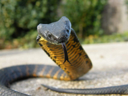

In [42]:
im = Image.open(dest)
im.to_thumb(128,128)

In [74]:
snake_types = 'venomous','non-venomous'
path = Path('snakes/non-venomous')

In [77]:
path    

Path('snakes/non-venomous')

In [78]:
import os
import shutil
# directory = 'the/directory/you/want/to/use'
files = []
for filename in os.listdir(path):
    files.append(filename)

In [79]:
len(files)

149

In [56]:
if not path.exists():
    path.mkdir()
    for o in snake_types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_bing(key, f'{o} snakes')
        download_images(dest, urls=results.attrgot('content_url'))

In [57]:
fns = get_image_files(path)
fns

(#299) [Path('snakes/non-venomous/00000004.jpg'),Path('snakes/non-venomous/00000088.jpg'),Path('snakes/non-venomous/00000146.jpg'),Path('snakes/non-venomous/00000129.jpg'),Path('snakes/non-venomous/00000025.jpg'),Path('snakes/non-venomous/00000133.jpg'),Path('snakes/non-venomous/00000136.jpg'),Path('snakes/non-venomous/00000046.jpg'),Path('snakes/non-venomous/00000014.jpg'),Path('snakes/non-venomous/00000107.jpg')...]

Remove corrupted images which got downloaded


In [58]:
failed = verify_images(fns)
failed

/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


(#5) [Path('snakes/non-venomous/00000080.jpg'),Path('snakes/venomous/00000088.jpg'),Path('snakes/venomous/00000137.jpg'),Path('snakes/venomous/00000077.jpg'),Path('snakes/venomous/00000110.jpg')]

In [59]:
failed.map(Path.unlink);

## From Data to DataLoaders

In [60]:
snakes = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [61]:
dls = snakes.dataloaders(path)

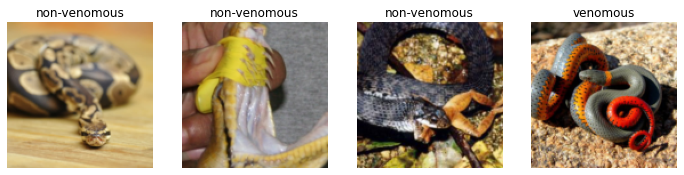

In [62]:
dls.valid.show_batch(max_n=4, nrows=1)

### Data Augmentation

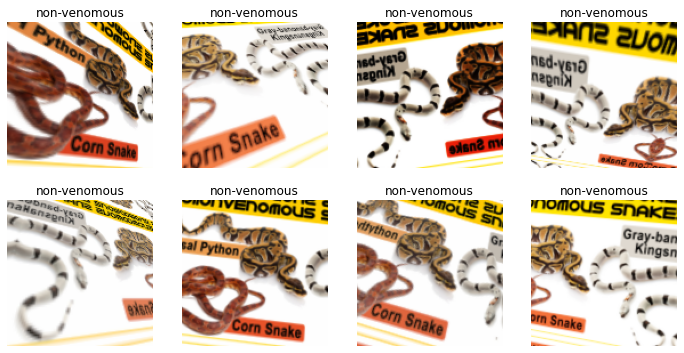

In [63]:
snakes = snakes.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = snakes.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

## Training Your Model, and Using It to Clean Your Data

In [64]:
snakes = snakes.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = snakes.dataloaders(path)

In [65]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.223031,1.334049,0.517241,00:05


/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


epoch,train_loss,valid_loss,error_rate,time
0,1.002105,1.316813,0.517241,00:06
1,0.984271,1.180810,0.551724,00:06
2,0.933488,1.089780,0.448276,00:06
3,0.840340,1.130982,0.465517,00:06


/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.w

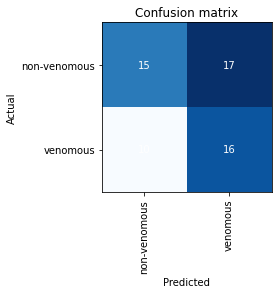

In [66]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

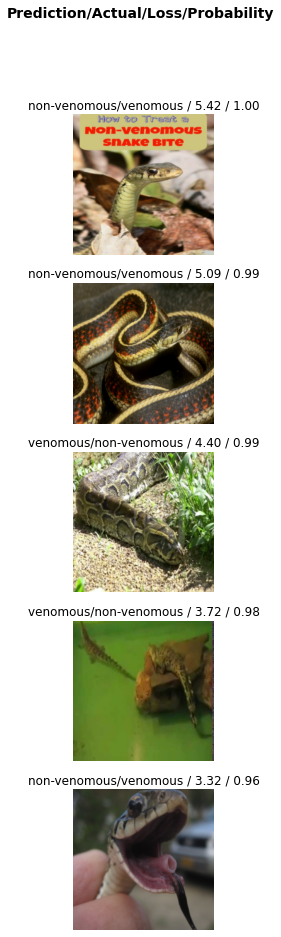

In [80]:
interp.plot_top_losses(5, nrows=5)

In [81]:
cleaner = ImageClassifierCleaner(learn)
cleaner

/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


In [ ]:
#hide
for idx in cleaner.delete(): cleaner.fns[idx].unlink()
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

## Turning Your Model into an Online Application

### Using the Model for Inference

In [82]:
learn.export()

In [83]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [84]:
learn_inf = load_learner(path/'export.pkl')

In [85]:
learn_inf.predict('images/venomous.jpg')

('venomous', tensor(1), tensor([0.0360, 0.9640]))

In [86]:
learn_inf.dls.vocab

(#2) ['non-venomous','venomous']